In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
def normalizeData(X):
    mean_X = np.mean(X, axis=0)
    std_X = np.std(X, axis=0)
    return (X-mean_X), mean_X

In [4]:
def eigOfDataCov(X):
    N, M = X.shape
    covMatrix = np.dot(X, X.T)/N
    eigVal, eigVec = np.linalg.eig(covMatrix)

    sort_index = np.argsort(eigVal)[::-1]
    return eigVal[sort_index], eigVec[:, sort_index]

In [5]:
COLS, img_ROWS, img_COLS = X_train.shape
X_processed = (X_train.reshape(-1, img_ROWS*img_COLS))/255.
X_processed.shape

(60000, 784)

In [6]:
def PCA(X, components=2):
    normalized_X, mean_X = normalizeData(X)
    eigVals, eigVecs = eigOfDataCov(normalized_X)
    P_eigVal, P_eigVec = eigVals[:components], np.real(eigVecs[:,:components])
    proj_matrix = P_eigVec @ np.linalg.inv(P_eigVec.T @ P_eigVec) @ P_eigVec.T
    recon_X = (proj_matrix @ normalized_X) + mean_X
    return recon_X, mean_X, P_eigVal, P_eigVec
    

In [7]:
recon_X, mean_X, principal_eigVal, principal_eigVec = PCA(X_processed[:1000])

In [8]:
#Unprocessed data
processed_data = recon_X.reshape(-1, *(28,28))*255
#PCA images on 2 basis vectors
reconImages = recon_X.reshape(-1, *(28,28))*255

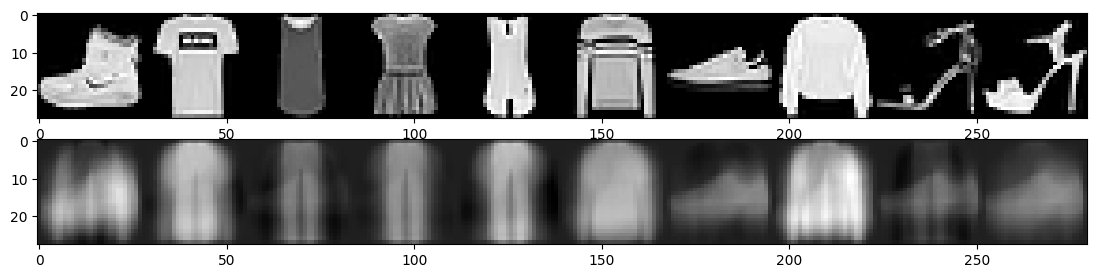

In [9]:
fig, ax = plt.subplots(2, 1, figsize=(100 * 3, 3))
ax[0].imshow(np.concatenate(np.reshape(X_train[:10], (-1, 28, 28)), -1), cmap="gray")
ax[1].imshow(np.concatenate(reconImages[:10], -1), cmap="gray");

In [10]:
mse = lambda pred, data : np.square(pred-data).sum(axis=1).mean()

In [11]:
reconImages.shape

(1000, 28, 28)

In [18]:
loss = []
reconstructions = []

for num_component in range(1, 100, 5):
    reconst, _, _, _ = PCA(X_processed[:1000], num_component)
    
    error = mse(reconst, X_processed[:1000])
    reconstructions.append(reconst)
    
    loss.append((num_component, error))

reconstructions = np.asarray(reconstructions)
reconstructions = reconstructions
loss = np.asarray(loss)

In [19]:
import pandas as pd
pd.DataFrame(loss, columns=['Components#', 'Mean Square Error']).head()

,Components#,Mean Square Error
0,1.0,48.220996
1,6.0,23.443520
2,11.0,18.019707
3,16.0,15.485723
4,21.0,13.755235


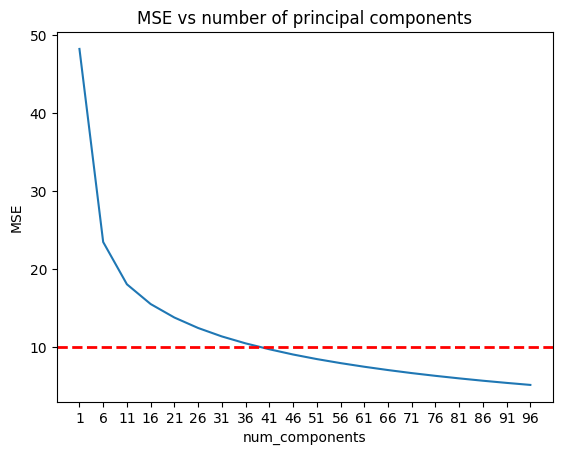

In [20]:
fig, ax = plt.subplots()
ax.plot(loss[:,0], loss[:,1]);
ax.axhline(10, linestyle='--', color='r', linewidth=2)
ax.xaxis.set_ticks(np.arange(1, 100, 5));
ax.set(xlabel='num_components', ylabel='MSE', title='MSE vs number of principal components');

In [23]:
#PCA using scikit-learn
from sklearn.decomposition import PCA

loss = []
reconstructions = []

for num_component in range(1, 100, 5):
    pca = PCA(n_components=num_component)
    pca_X = pca.fit_transform(X_processed[:1000])
    error = mse(reconst, X_processed[:1000])
    reconstructions.append(reconst)
    
    loss.append((num_component, error))

reconstructions = np.asarray(reconstructions)
reconstructions = reconstructions
loss = np.asarray(loss)


In [25]:
pd.DataFrame(loss, columns=['Components#', 'Mean Square Error']).head()

,Components#,Mean Square Error
0,1.0,5.107264
1,6.0,5.107264
2,11.0,5.107264
3,16.0,5.107264
4,21.0,5.107264
